In this notebook, 

- we will read an image as numpy array
- create a vector database
- conver image as vector and store in the vector database
- and read it again from vector database

In [1]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('database/cute_panda.jpg')
print(type(img))

<class 'numpy.ndarray'>


In [2]:
img.dtype

dtype('uint8')

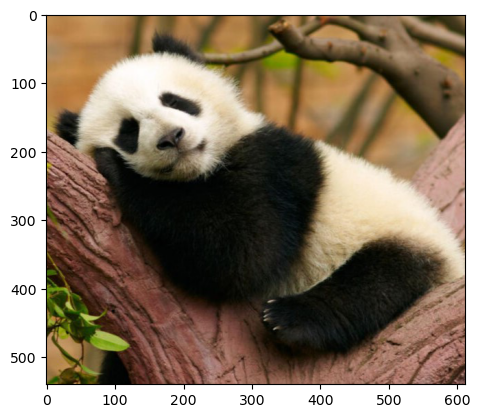

In [3]:
plt.imshow(img)

### Create a vector database

- create a vector table in the database
- convert numpy array(image) in to bytes 
- store in the image_vector table

In [4]:
import sqlite3
conn = sqlite3.connect('database/image_db.db')
cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS image_vector(
    id INTEGER,
    image BLOB NOT NULL)
""")

cursor.execute("INSERT INTO image_vector(image) VALUES(?)",
              (sqlite3.Binary(img.tobytes()), ))

### Read image from the vector database

In [5]:
cursor.execute('SELECT image from image_vector')
image = cursor.fetchall()
#image[0]

### Convert into numpy array again and reshape as previous numpy array of image

In [6]:
image = np.frombuffer(image[0][0], dtype = img.dtype)

In [7]:
image

array([192, 139,  85, ..., 139,  98,  92], dtype=uint8)

In [8]:
image = np.reshape(image, img.shape)

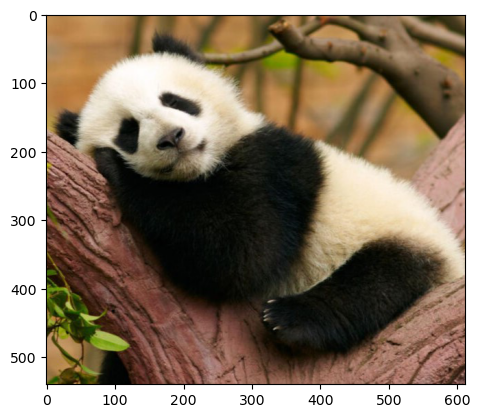

In [9]:
plt.imshow(image)